In [97]:
import numpy as np
import vector as vec
import numba
vec.register_numba()
vec.register_awkward()
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns

The point are ordered by
- gluon Z  [0]
- pt (top_had, top_lep, H)  [1,2,3]
- eta (top_had, top_lep, H) [4,5,6]
- phi (top_had, top_lep, H) [7,8,9]

   

In [158]:
TOP_MASS = 172.69;
HIGGS_MASS = 125.25;
Pmax = 600;
glu_pz = 6.5e3;

In [3]:
def rescale_linear(vec, pmax=Pmax):
    return -pmax + (2*pmax)*vec

def rescale_eta(vec):
    theta = -np.pi + (2*np.pi*vec)
    s = np.sign(theta)
    return  -s* np.log(np.tan(abs(theta)/2))

def rescale_angle(vec):
    return 2*np.pi*vec

def rescale_points_to_coord(vec):
    vec[:,1:4] = rescale_linear(vec[:,1:4])
    vec[:,4:7] = rescale_eta(vec[:,4:7])
    vec[:,8:10] = rescale_angle(vec[:,8:10])
    

In [4]:
N = 10000
points = np.random.rand(N, 10)
rescale_points_to_coord(points)


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x7f81b93b8670> (for post_execute):



KeyboardInterrupt



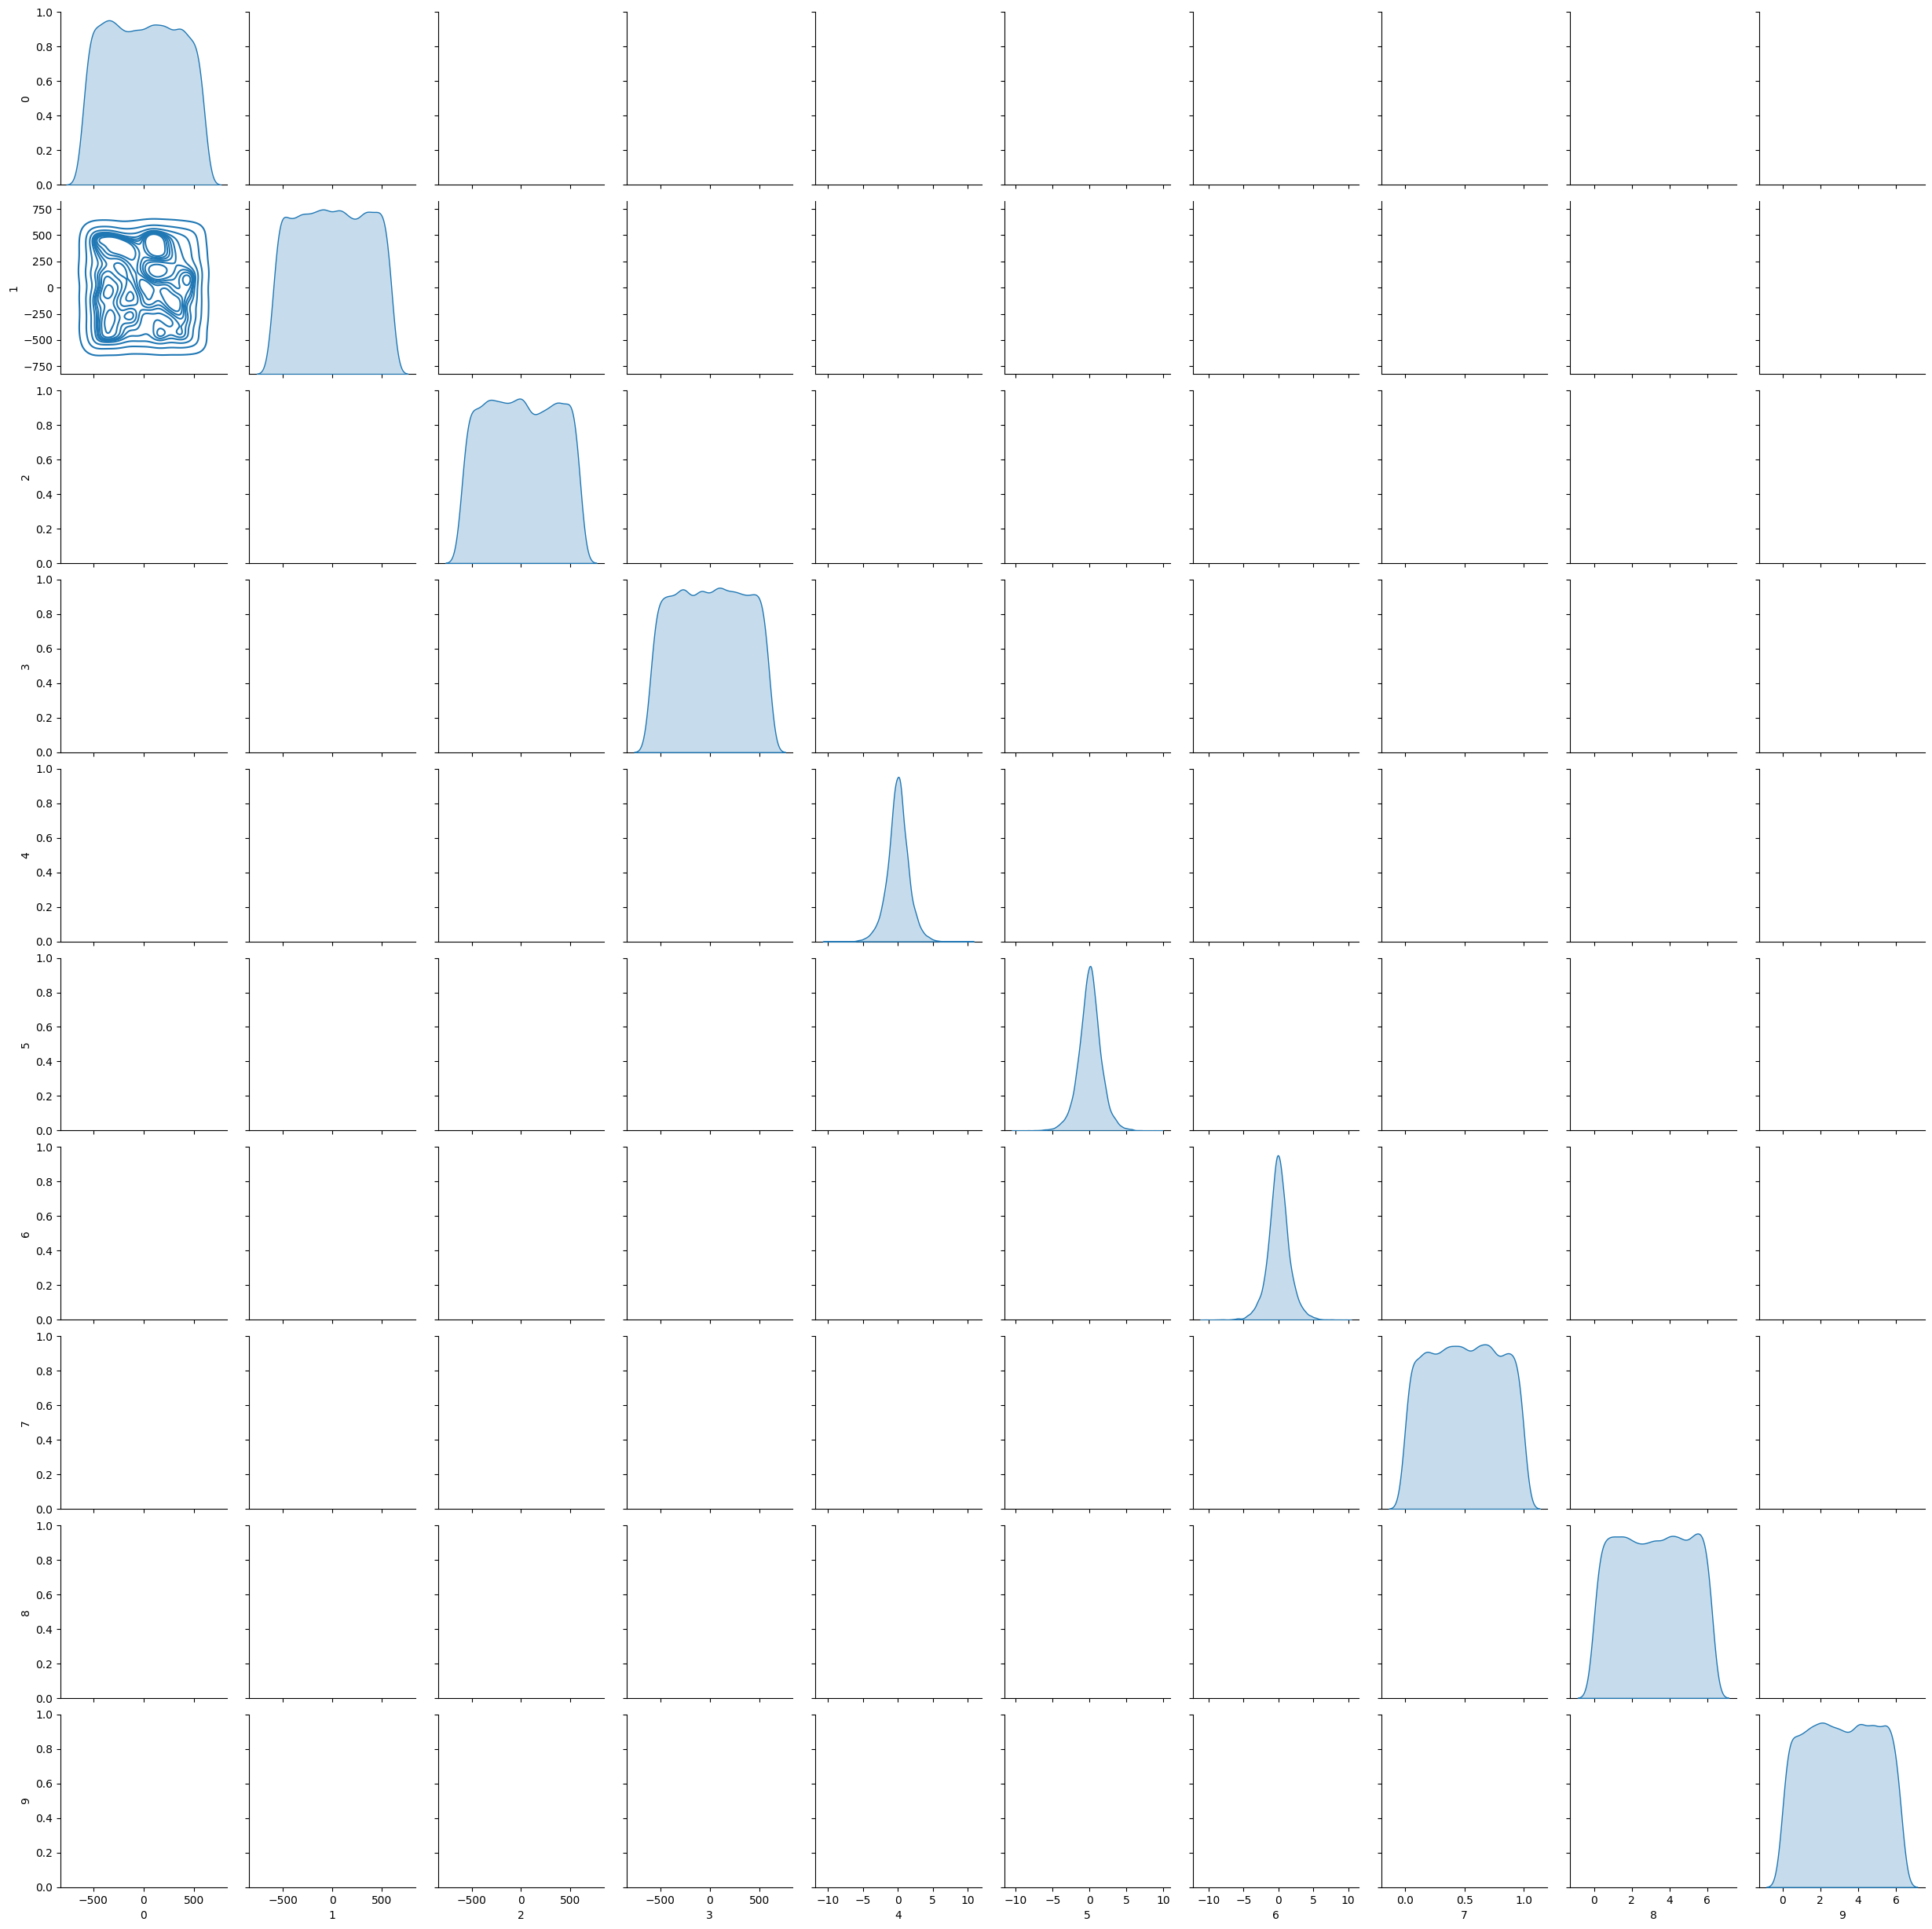

In [5]:
sns.pairplot(pd.DataFrame(points), kind="kde")

## Transform coodinates to vectors

In [5]:
top_had = vec.array(
    {
        "pt":  points[:,1],
        "eta": points[:,4],
        "phi": points[:,7],
        "M"  : np.ones(N)*TOP_MASS
    }
)

top_lep = vec.array(
    {
        "pt":  points[:,2],
        "eta": points[:,5],
        "phi": points[:,8],
        "M"  : np.ones(N)*TOP_MASS
    }
)

higgs = vec.array(
    {
        "pt":  points[:,3],
        "eta": points[:,6],
        "phi": points[:,9],
        "M"  : np.ones(N)*HIGGS_MASS
    }
)

In [6]:
fs_particles = top_had + top_lep + higgs
recoil = -fs_particles

In [7]:
# Build the FSR gluon to balance total px,py

In [71]:
sign_mod = np.sign(recoil.pz)*np.abs(recoil.pz)
y0 = - (pp_En - sign_mod)
y1 = (pp_En + sign_mod)
glu_z =  y0 + (y1-y0)*points[:,0]
gluon = vec.array({"x": recoil.px, "y": recoil.py, "z": glu_z, "mass": np.zeros(N)})

In [88]:
initial_boost = fs_particles + gluon

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   4.,   5.,
          8.,  13.,  16.,  30.,  30.,  30.,  68.,  68.,  92.,  94., 113.,
        132., 142., 148., 153., 181., 180., 201., 190., 197., 207., 212.,
        217., 190., 187., 201., 178., 218., 182., 188., 181., 162., 150.,
        136., 126., 167., 158., 128., 134., 115., 120., 105., 107., 101.,
         85.,  84.,  95.,  79.,  91.,  72.,  82.,  74.,  78.,  79.,  64.,
         58.,  63.,  65.,  57.,  60.,  40.,  42.,  46.,  46.,  56.,  57.,
         41.,  45.,  46.,  49.,  43.,  32.,  36.,  33.,  29.,  32.,  32.,
         32.,  29.,  30.,  38.,  31.,  27.,  23.,  33.,  26.,  18.,  29.,
         27.,  28.,  26.,  20.,  26.,  24.,  14.,  26.,  12.,  19.,  13.,
         24.,  15.,  18.,  19.,  14.,  19.,  14.,  10.,  15.,  11.,  16.,
         14.,  16.,  13.,  11.,  16.,  14.,  13.,  12.,  14.,  17.,  14.,
          9.,   9.,   7.,  10.,   9.,  13.,   9.,   9.,  10.,  11.,  14.,
          9.,  12.,  14.,   9.,  11., 

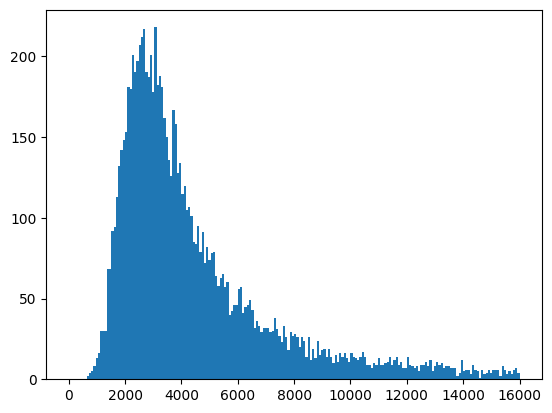

In [106]:
plt.hist(initial_boost.mass, range=(0, 16000),bins=200 )

abs(p)x1 + abs(p)x2 = 2p
(x1+x2) = 2 --> x2 = 2-x1

p(x1-x2) = boost

x1+ x1 -2 = boost/ p

x1 = 1 + boost/(2p)

In [92]:
in_gluon1 = vec.array({"x": np.zeros(N), "y": np.zeros(N), "z": np.ones(N)*pp_En + initial_boost.pz, "mass": np.zeros(N)})
in_gluon2 = vec.array({"x": np.zeros(N), "y": np.zeros(N), "z": -np.ones(N)*pp_En  initial_boost.pz, "mass": np.zeros(N)})

(array([1014.,  967.,  984., 1005.,  991., 1032., 1005.,  978., 1019.,
        1005.]),
 array([-1.29995299e+04, -1.16996002e+04, -1.03996705e+04, -9.09974087e+03,
        -7.79981120e+03, -6.49988154e+03, -5.19995187e+03, -3.90002221e+03,
        -2.60009255e+03, -1.30016288e+03, -2.33216680e-01]),
 <BarContainer object of 10 artists>)

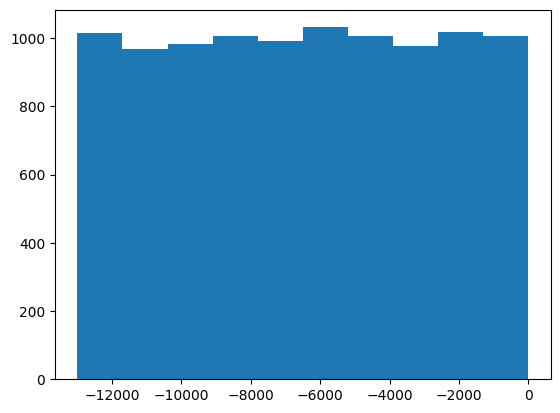

In [101]:
plt.hist(in_gluon2.pz)

# Rambo

p[0] * x**n + p[1] * x**(n-1) + ... + p[n-1]*x + p[n]

In [118]:
np.roots([-2, 3, 0, -0.77])

array([ 1.25591579,  0.68900197, -0.44491776])

$R =- (n-i)x^{n+1-i} + (n+1-i)x^{n-i} $

n = 4
i from 2 to n-1=3

In [227]:
@numba.njit
def ui(n, i, r):
    if i == 2:
        return np.roots( np.array([-(n-i), (n+1-i), 0,  -r]))[1]
    elif i == 3:
        return np.roots( np.array([ -(n-i), (n+1-i), -r]))[1]
    elif i == 4:
        return 

In [205]:
x1 = 0.2
x2 = 0.5
init_glu1 = vec.obj(px=0, py=0, pz=x1*glu_pz, mass=0)
init_glu2 = vec.obj(px=0, py=0, pz= -x2*glu_pz, mass=0)

In [260]:
#initial boost
Qinit = init_glu1+init_glu2
M_1 = Qinit.mass

In [239]:
M_1

4110.960958218893

In [262]:
Qinit

vector.obj(px=0, py=0, pz=-1950.0, mass=4110.960958218893)

In [222]:
n = 4


In [253]:
def rho(a,b,c):
    return (1/(8*a**2))*np.sqrt((a**2 - (b+c)**2)*(a**2 - (b-c)**2))

In [271]:
n = 4
r = np.random.rand(3*n - 4)

Q_i = [None]*n
Q_i[0] = Qinit
P_i = [None]*n

M_i = np.ones((n))
M_i[0] = M_1

u_i = np.ones((n))
cos_i = np.ones((n))
phi_i = np.ones((n))
q_i = np.ones((n))


np.random.rand(3*n - 4)
for i in range(2, n+1):
    print(i)
    j = i-1 # to get the indexing right  j == i in the paper (base1)
    u_i[j] = ui(n, i, r[j-1])
    M_i[j] = np.prod(u_i)*M_i[0]
    cosi = 2*r[n-5+2*i - 1] -1 
    cos_i[j] = cosi
    phii = 2*np.pi* r[n-4+2*i - 1]
    phi_i[j] = phii
    qi = 4*M_i[j-1]*rho(M_i[j-1], M_i[j], 0)
    q_i[j] = qi
    P_i[j-1] = vec.obj(mass=qi, 
                       px=qi*(np.cos(phii)*np.sqrt(1-cosi**2)),
                       py=qi*(np.sin(phii)*np.sqrt(1-cosi**2)),
                       pz=qi*(cosi))

2
3
4


In [272]:
Q_i

[vector.obj(px=0, py=0, pz=-1950.0, mass=4110.960958218893), None, None, None]

In [242]:
M_i

array([4.11096096e+03, 2.07528069e+03, 5.67025882e+02, 1.00000000e+00])

In [273]:
P_i

[vector.obj(px=0.8307880492741413, py=-95.80578546077979, pz=-1558.8377172716969, mass=1561.779263380512),
 vector.obj(px=-300.10819948737935, py=182.29042692094563, pz=763.246731108402, mass=840.1430257368316),
 vector.obj(px=nan, py=nan, pz=nan, mass=nan),
 None]